In [45]:
import pandas as pd

# Load the data
baseball_data = pd.read_csv('IST707FinalProjectData - Sheet1.csv')

# Display the head of the dataframe
baseball_data.tail()

baseball_data

,Player,Season,Age,Team,Lg,G,PA,AB,R,H,...,WAA,oWAR,dWAR,Rbat,Rdp,Rbaser,Rbaser + Rdp,Rfield,Pos,Player-additional
0,Mookie Betts,2023,30,LAD,NL,152,693,584,126,179,...,6.4,7.5,0.9,55,0,1,1,10,946/H,bettsmo01
1,Ronald Acuña Jr.,2023,25,ATL,NL,159,735,643,149,217,...,6.0,8.5,-0.8,63,-1,7,6,-3,*9/D,acunaro01
2,Matt Olson,2023,29,ATL,NL,162,720,608,127,172,...,5.2,6.6,0.0,52,-1,1,0,8,*3,olsonma02
3,Marcus Semien,2023,32,TEX,AL,162,753,670,122,185,...,5.2,5.7,2.3,24,1,4,5,16,*4,semiema01
4,Corey Seager,2023,29,TEX,AL,119,536,477,88,156,...,5.3,6.4,1.2,42,1,-2,-1,5,*6/D,seageco01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2601,Ángel Berroa,2005,27,KCR,AL,159,652,608,68,164,...,-2.8,1.6,-1.2,-17,1,0,1,-21,*6,berroan01
2602,Adam LaRoche,2005,25,ATL,NL,141,502,451,53,117,...,-2.3,0.6,-2.1,0,0,-2,-2,-13,*3H,larocad01
2603,Mike Lowell,2005,31,FLA,NL,150,558,500,56,118,...,-2.6,-0.1,-0.5,-17,-2,-1,-3,-7,*5H/4,lowelmi01
2604,Scott Hatteberg,2005,35,OAK,AL,134,523,464,52,119,...,-2.8,-0.6,-1.3,-12,-2,0,-3,-3,D3H,hattesc01


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: Futur

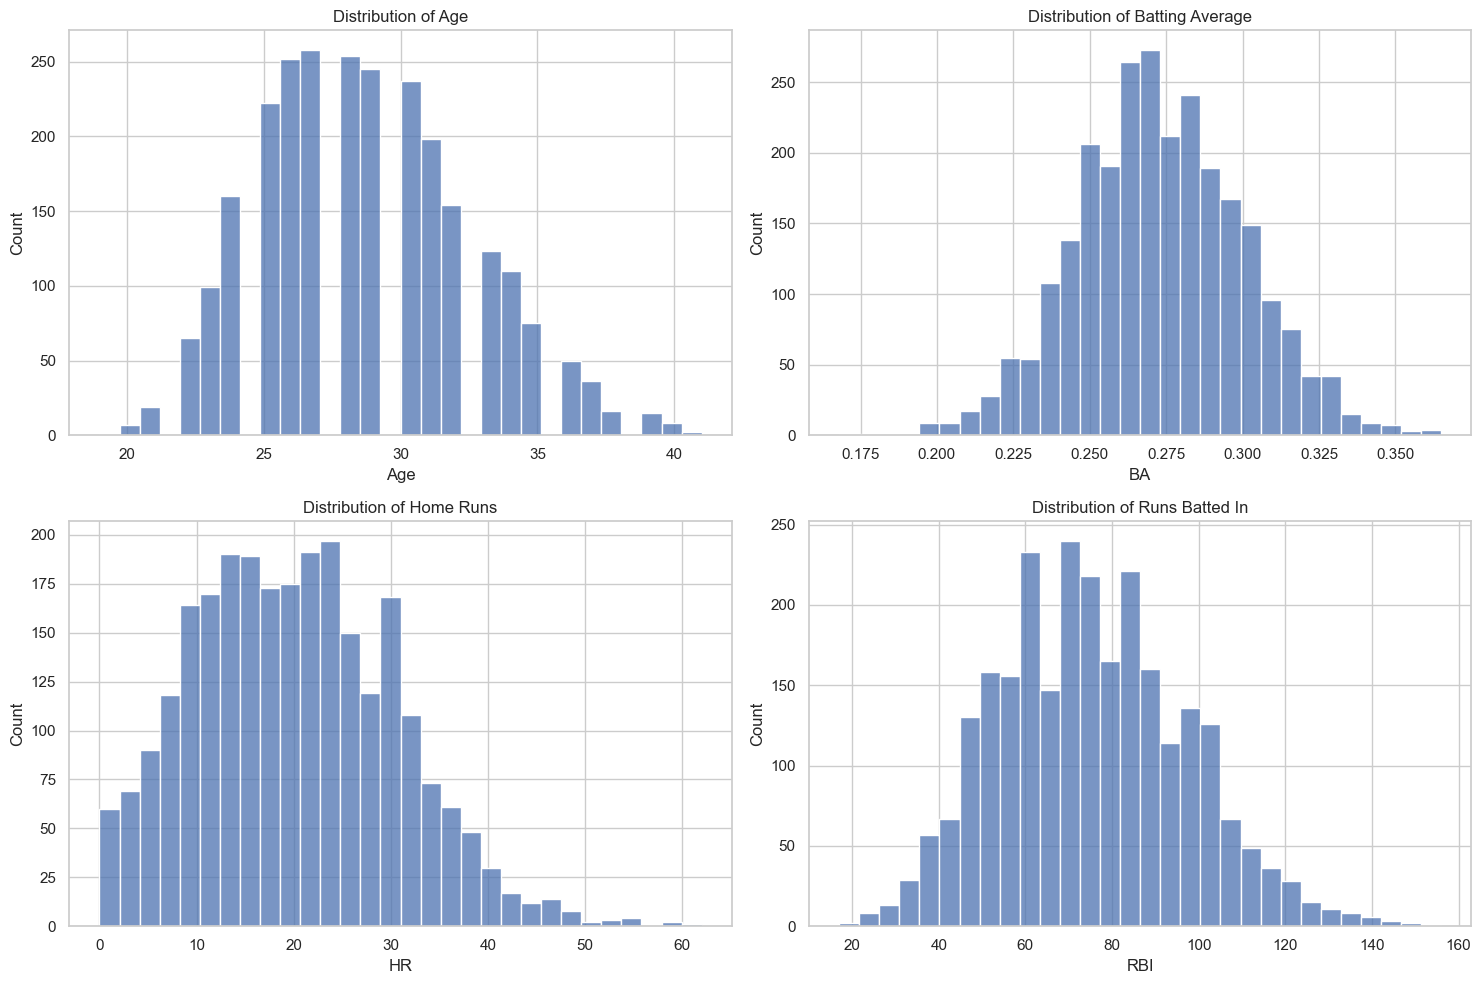

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# style of the visualization
sns.set(style='whitegrid')

#set of subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# distribution of the 'Age' column
sns.histplot(baseball_data['Age'], kde=False, bins=30, ax=axs[0, 0])
axs[0, 0].set_title('Distribution of Age')

# distribution of the 'BA' column
sns.histplot(baseball_data['BA'], kde=False, bins=30, ax=axs[0, 1])
axs[0, 1].set_title('Distribution of Batting Average')

# distribution of the 'HR' column
sns.histplot(baseball_data['HR'], kde=False, bins=30, ax=axs[1, 0])
axs[1, 0].set_title('Distribution of Home Runs')

# distribution of the 'RBI' column
sns.histplot(baseball_data['RBI'], kde=False, bins=30, ax=axs[1, 1])
axs[1, 1].set_title('Distribution of Runs Batted In')

plt.tight_layout()
plt.show()

In [26]:
#Next, let's perform a time series analysis to understand the temporal evolution of player performance. 
#We'll focus on the average Batting Average (BA) and Home Runs (HR) per season.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: Futur

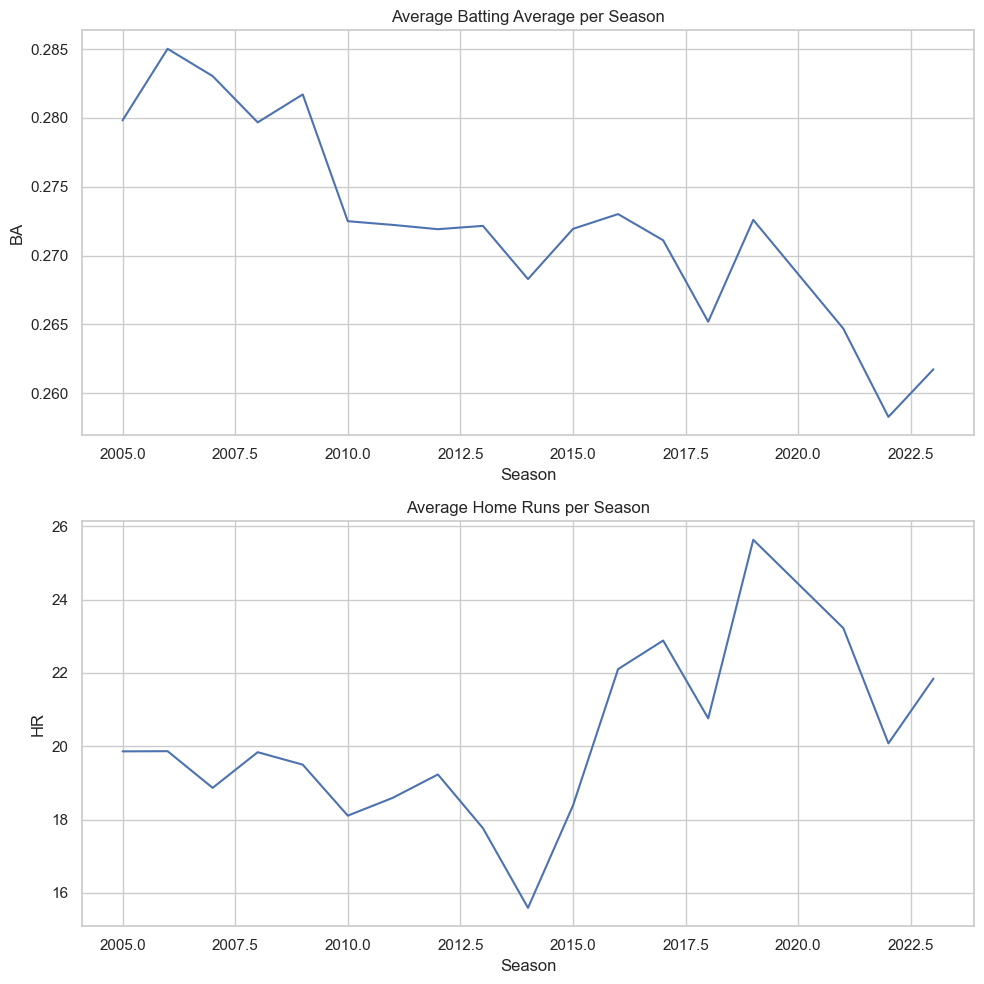

In [27]:
# Group the data by 'Season' and calculate the mean 'BA' and 'HR'
season_data = baseball_data.groupby('Season')[['BA', 'HR']].mean().reset_index()

# Plot the average 'BA' and 'HR' per season
fig, axs = plt.subplots(nrows=2, figsize=(10, 10))

sns.lineplot(x='Season', y='BA', data=season_data, ax=axs[0])
axs[0].set_title('Average Batting Average per Season')

sns.lineplot(x='Season', y='HR', data=season_data, ax=axs[1])
axs[1].set_title('Average Home Runs per Season')


plt.tight_layout()
plt.show()

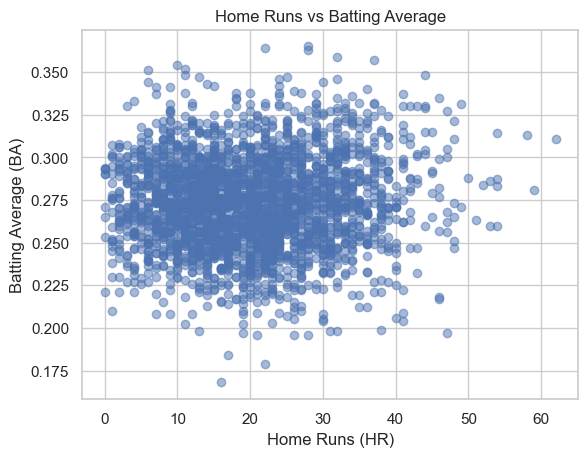

In [28]:
plt.scatter(baseball_data['HR'], baseball_data['BA'], alpha=0.5)
plt.title('Home Runs vs Batting Average')
plt.xlabel('Home Runs (HR)')
plt.ylabel('Batting Average (BA)')
plt.show()

In [34]:
baseball_data.head()

,Player,Season,Age,Team,Lg,G,PA,AB,R,H,...,WAA,oWAR,dWAR,Rbat,Rdp,Rbaser,Rbaser + Rdp,Rfield,Pos,Player-additional
0,Mookie Betts,2023,30,LAD,NL,152,693,584,126,179,...,6.4,7.5,0.9,55,0,1,1,10,946/H,bettsmo01
1,Ronald Acuña Jr.,2023,25,ATL,NL,159,735,643,149,217,...,6.0,8.5,-0.8,63,-1,7,6,-3,*9/D,acunaro01
2,Matt Olson,2023,29,ATL,NL,162,720,608,127,172,...,5.2,6.6,0.0,52,-1,1,0,8,*3,olsonma02
3,Marcus Semien,2023,32,TEX,AL,162,753,670,122,185,...,5.2,5.7,2.3,24,1,4,5,16,*4,semiema01
4,Corey Seager,2023,29,TEX,AL,119,536,477,88,156,...,5.3,6.4,1.2,42,1,-2,-1,5,*6/D,seageco01


In [29]:
from sklearn.model_selection import train_test_split

# Group the data by season 
season_data = baseball_data.groupby('Season')[['R']].mean().reset_index()

# Split the data into training and testing sets
train_data, test_data = train_test_split(season_data, test_size=0.2, shuffle=False)

# Print the number of observations in the training and testing sets
len(train_data), len(test_data)

(14, 4)

In [33]:
season_data.head()

,Season,R
0,2005,81.107383
1,2006,84.518519
2,2007,82.629630
3,2008,82.387755
4,2009,80.554839


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: Futur

Text(0.5, 1.0, 'Average Runs per Season')

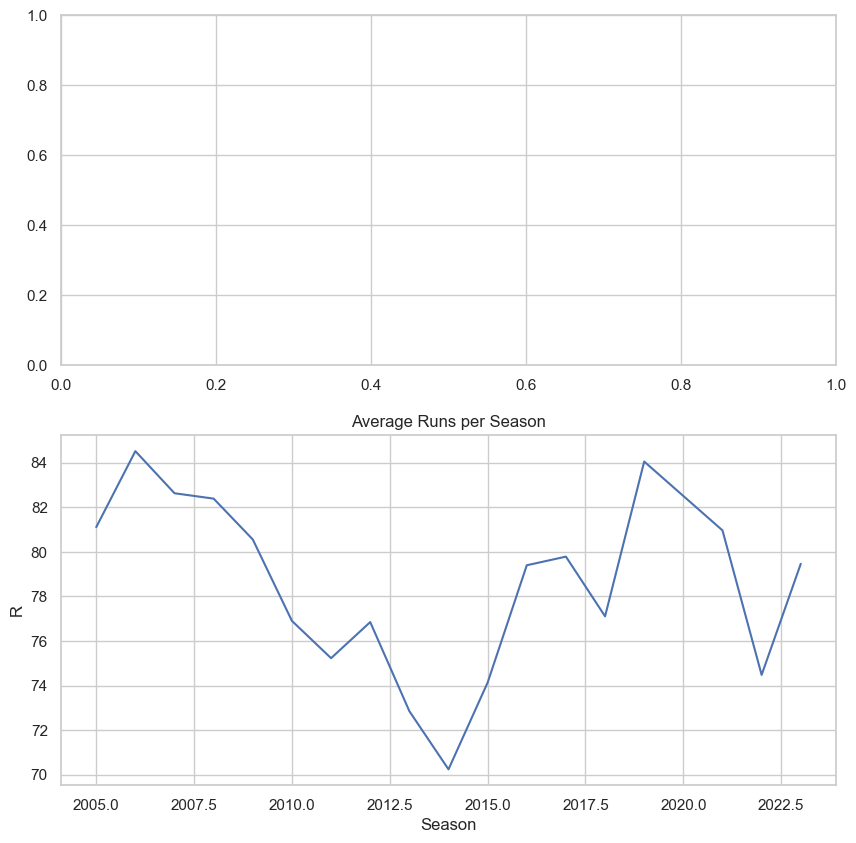

In [30]:
fig, axs = plt.subplots(nrows=2, figsize=(10, 10))
sns.lineplot(x='Season', y='R', data=season_data, ax=axs[1])
axs[1].set_title('Average Runs per Season')

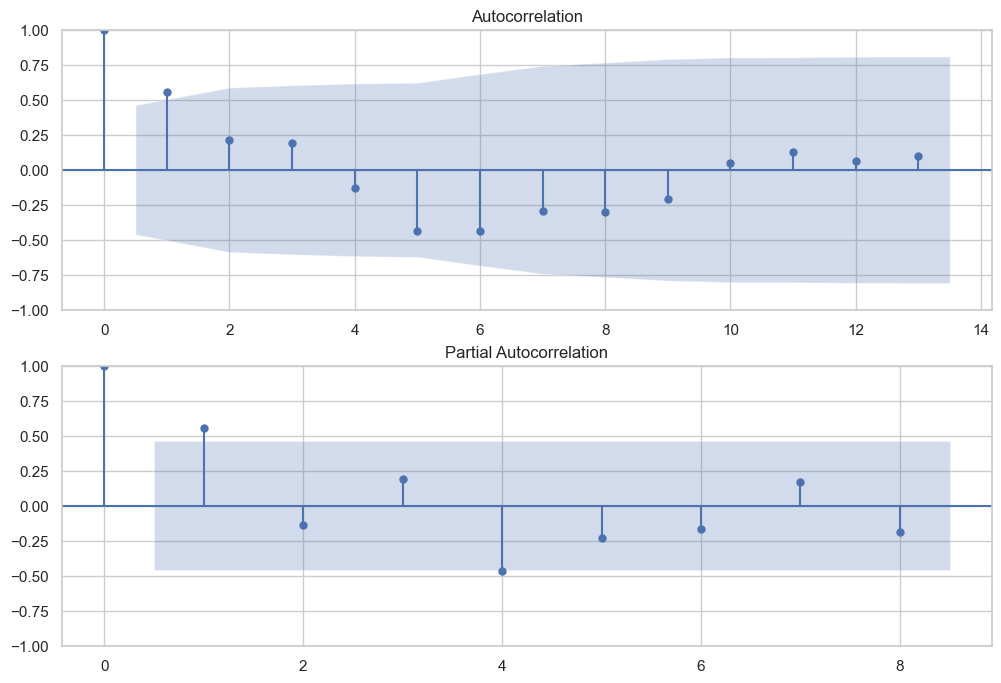

In [8]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot the ACF and PACF for 'R' with fewer lags
fig, ax = plt.subplots(2, figsize=(12,8))
plot_acf(season_data['R'], ax=ax[0])
plot_pacf(season_data['R'], ax=ax[1], lags=8)
plt.show()

In [36]:
from statsmodels.tsa.stattools import adfuller

# Augmented Dickey-Fuller test on 'R'
result = adfuller(season_data['R'])

# p-value
result[1]

0.008625848965530395

In [37]:
from statsmodels.tsa.arima.model import ARIMA

# Fit an ARIMA(1,0,0) model to the 'R' time series
model = ARIMA(season_data['R'], order=(1,0,0))
model_fit = model.fit()

# model summary
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      R   No. Observations:                   18
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 -46.756
Date:                Sat, 02 Dec 2023   AIC                             99.511
Time:                        19:32:19   BIC                            102.182
Sample:                             0   HQIC                            99.880
                                 - 18                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         78.6901      1.745     45.102      0.000      75.271      82.110
ar.L1          0.5426      0.256      2.122      0.034       0.041       1.044
sigma2        10.3586      4.301      2.408      0.016       1.929      18.789
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):                 0.36
Prob(Q):                              0.70   Prob(JB):                         0.83
Heteroskedasticity (H):               2.35   Skew:                            -0.02
Prob(H) (two-sided):                  0.32   Kurtosis:                         2.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

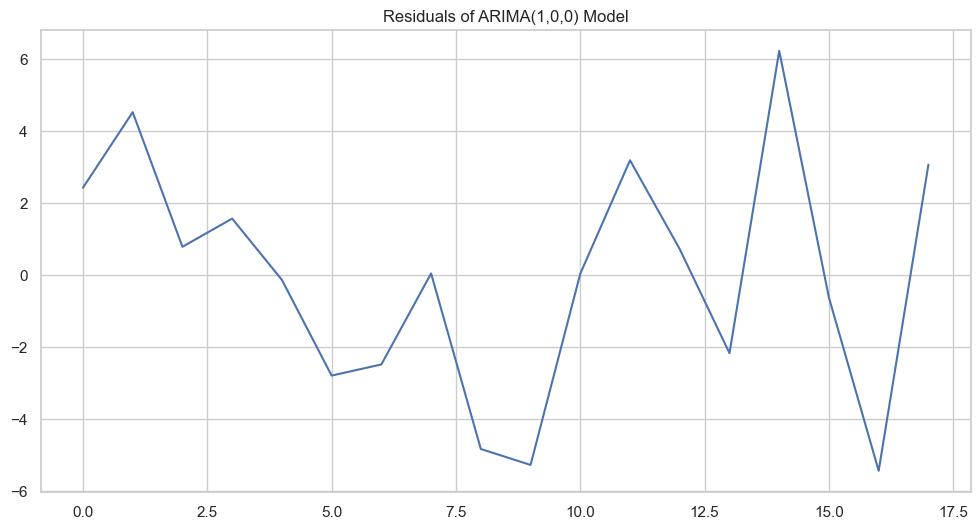

In [38]:
# residuals
residuals = model_fit.resid

# Plot the residuals
plt.figure(figsize=(12,6))
plt.plot(residuals)
plt.title('Residuals of ARIMA(1,0,0) Model')
plt.show()

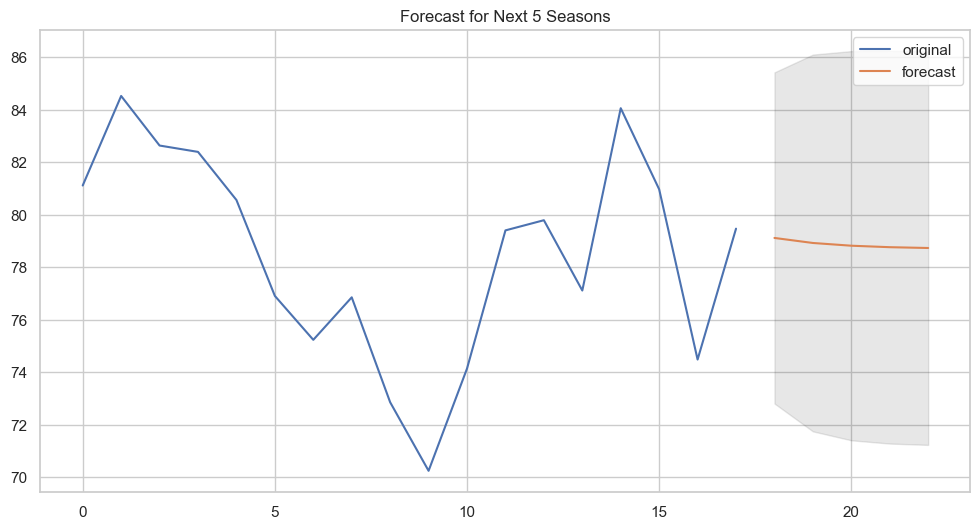

In [39]:
# forecast for next 5 seasons
forecast = model_fit.get_forecast(steps=5)

forecast

# the forecasted values and confidence intervals
pred = forecast.predicted_mean
conf_int = forecast.conf_int()

# Plot the original data, the forecasts, and the confidence intervals
plt.figure(figsize=(12,6))
plt.plot(season_data['R'], label='original')
plt.plot(pred, label='forecast')
plt.fill_between(conf_int.index, conf_int.iloc[:,0], conf_int.iloc[:,1], color='k', alpha=0.1)
plt.title('Forecast for Next 5 Seasons')
plt.legend()
plt.show()

In [42]:
from statsmodels.tsa.stattools import adfuller
from itertools import product
from tqdm import tqdm
import numpy as np

# p, d, and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generating all different combinations of p, d, and q triplets
pdq = list(product(p, d, q))

# grid search to find the best ARIMA model
best_aic = np.inf
best_bic = np.inf
best_pdq = None
best_model = None

for param in tqdm(pdq):
    try:
        model = ARIMA(season_data['R'], order=param)
        results = model.fit()
        if results.aic < best_aic:
            best_aic = results.aic
            best_bic = results.bic
            best_pdq = param
            best_model = results
    except Exception as e:
        continue

# Output the best ARIMA model parameters and corresponding AIC/BIC
print('Best ARIMA model order:', best_pdq)
print('Best ARIMA model AIC:', best_aic)
print('Best ARIMA model BIC:', best_bic)

# Check if the data is stationary
print('ADF Test p-value:', result[1])

 41%|█████████████████▌                         | 11/27 [00:00<00:00, 54.84it/s]/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 63%|███████████████████████████                | 17/27 [00:00<00:00, 49.15it/s]/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Library/F

Best ARIMA model order: (2, 2, 0)
Best ARIMA model AIC: 92.93974538212154
Best ARIMA model BIC: 95.25751154884088
ADF Test p-value: 0.008625848965530395


In [43]:
# Now that we have the best ARIMA model parameters, let's fit the model and look at the summary
best_model = ARIMA(season_data['R'], order=(2, 2, 0))
best_model_fit = best_model.fit()

# Summary of the best ARIMA model
best_model_summary = best_model_fit.summary()


(best_model_summary)



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      R   No. Observations:                   18
Model:                 ARIMA(2, 2, 0)   Log Likelihood                 -43.470
Date:                Sat, 02 Dec 2023   AIC                             92.940
Time:                        19:35:25   BIC                             95.258
Sample:                             0   HQIC                            93.058
                                 - 18                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5991      0.148     -4.054      0.000      -0.889      -0.309
ar.L2         -0.7771      0.235     -3.308      0.001      -1.238      -0.317
sigma2        11.8524      5.503      2.154      0.031       1.066      22.639
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):                 0.31
Prob(Q):                              0.70   Prob(JB):                         0.86
Heteroskedasticity (H):               2.63   Skew:                             0.02
Prob(H) (two-sided):                  0.31   Kurtosis:                         2.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

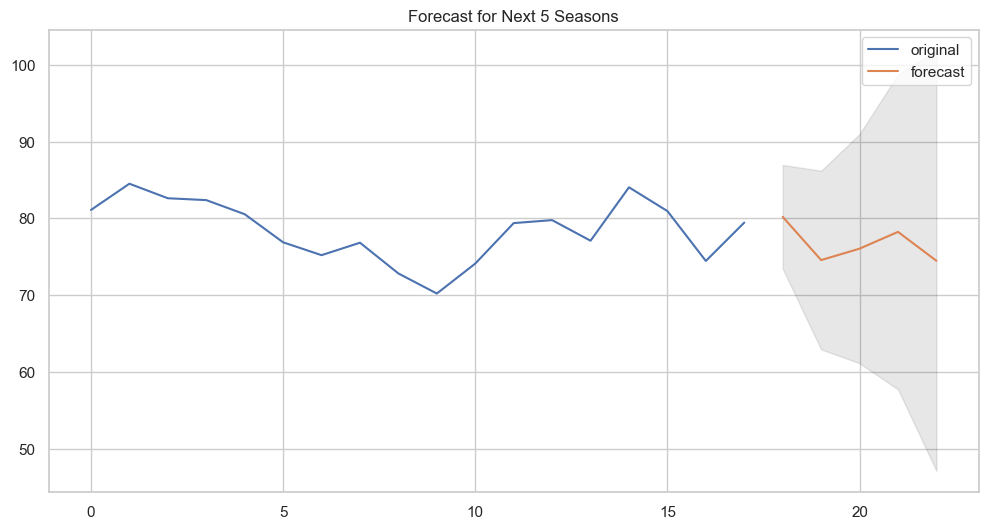

In [44]:
# forecast for next 5 seasons
forecast = best_model_fit.get_forecast(steps=5)

forecast

# forecasted values and confidence intervals
pred = forecast.predicted_mean
conf_int = forecast.conf_int()

# Plot the original data, the forecasts, and the confidence intervals
plt.figure(figsize=(12,6))
plt.plot(season_data['R'], label='original')
plt.plot(pred, label='forecast')
plt.fill_between(conf_int.index, conf_int.iloc[:,0], conf_int.iloc[:,1], color='k', alpha=0.1)
plt.title('Forecast for Next 5 Seasons')
plt.legend()
plt.show()